## Context:
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help
## Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.


### Dataset:  
ALLLife bank
### Data Description: 
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

Apply the concepts and techniques you have learned in the previous weeks and summarize your insights at the end.

### Key Questions:

1. Perform EDA.
2. Apply Clustering Algorithms and mentions how many clusters are formed ?
3. How are these segments different from each other?
4. What are your recommendations to the bank on how to better market to and service these customers?


### Submission Guidelines :

1. You need to submit a python notebook in both ".ipynb anD HTML" format.
2. Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
4. Submission will not be evaluated if,
    * it is submitted post-deadline, or,
    * more than 2 files are submitted

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('Credit Card Customer Data.xlsx')

In [4]:
data.shape

(660, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


Sl_No looks like an ID column, so I'll get rid of that

In [8]:
data.drop(columns=['Sl_No'],inplace=True)

In [10]:
data.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

This dataset has no null values in it

In [13]:
data.nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

Looks like there are 655 customer keys in 660 observations

In [19]:
dup = data.duplicated()
dup.value_counts()

False    660
dtype: int64

Since there are no duplicate rows, each observation is unique, so I'll just drop Customer Key and assume that the duplicated Customer Keys were human error

In [20]:
data.drop(columns=['Customer Key'], inplace=True)

## EDA

In [21]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

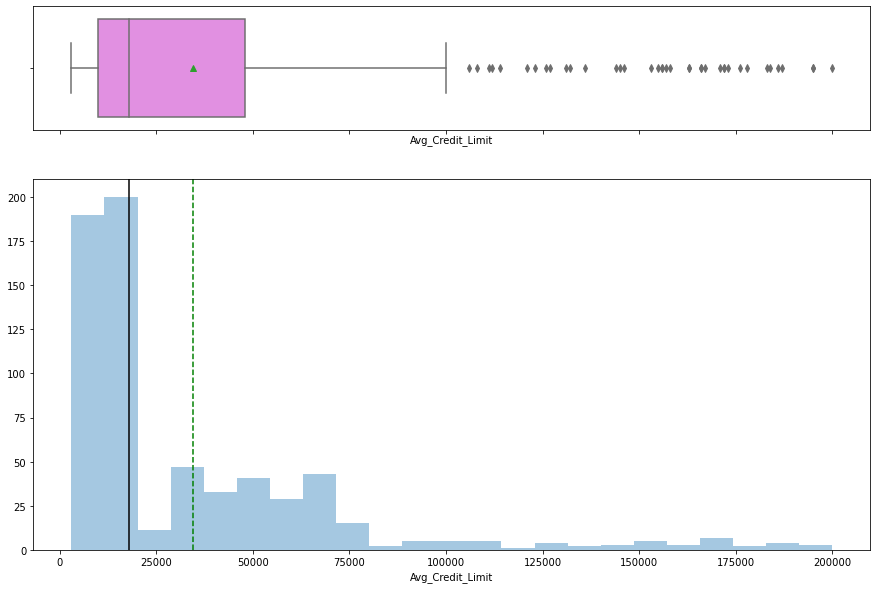

In [22]:
# Avg_Credit_Limit
histogram_boxplot(data['Avg_Credit_Limit'])

- Avg_Credit_Limit is skewed to the right, with a bunch of outliers higher than 100,000

In [23]:
# Outlier treatment on Avg_Credit_Limit
data['Avg_Credit_Limit'].clip(upper=100000,inplace=True)

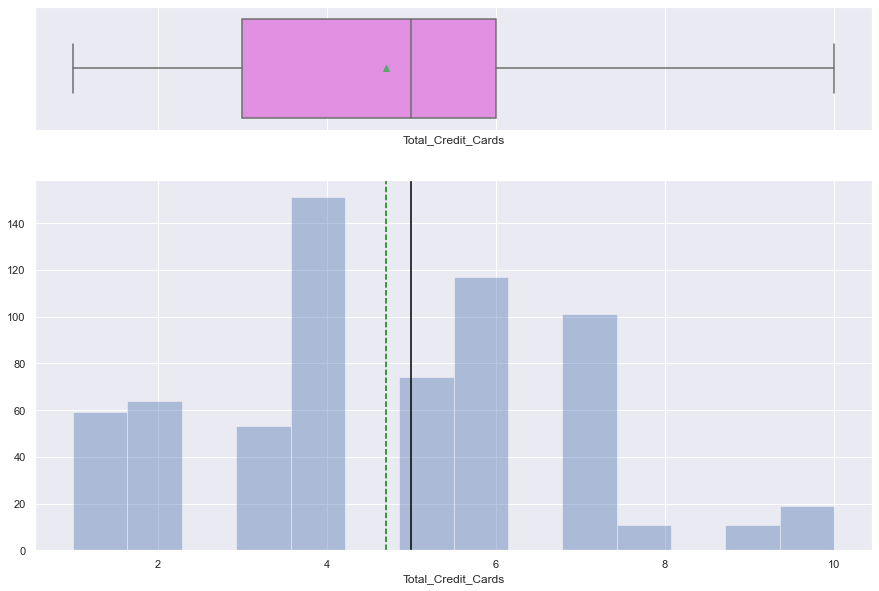

In [33]:
# Total_Credit_Cards
histogram_boxplot(data['Total_Credit_Cards'])

Data is distributed normally, with the mean and median being right around 5

<AxesSubplot:xlabel='Total_visits_bank', ylabel='count'>

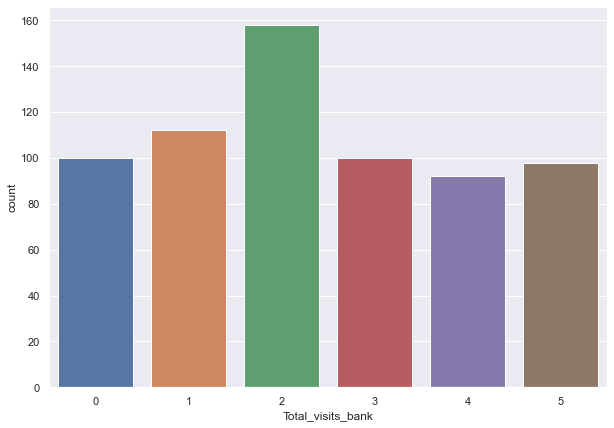

In [39]:
# Total_visits_bank ,Total_visits_online, Total_calls_made
sns.countplot(data['Total_visits_bank'])

<AxesSubplot:xlabel='Total_visits_online', ylabel='count'>

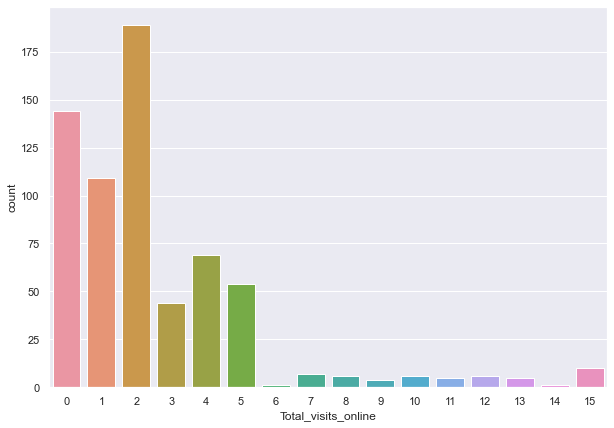

In [40]:
sns.countplot(data['Total_visits_online'])

<AxesSubplot:xlabel='Total_calls_made', ylabel='count'>

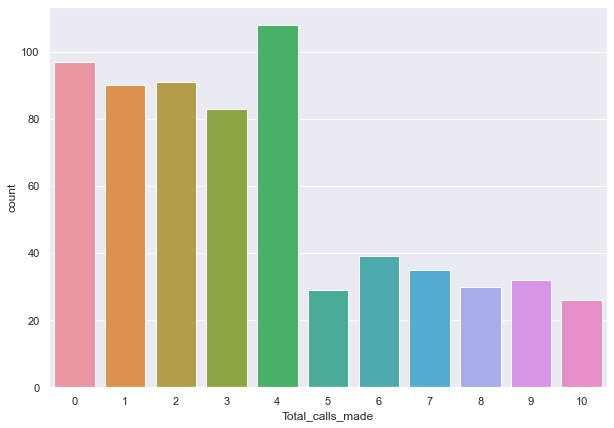

In [41]:
sns.countplot(data['Total_calls_made'])

- The most frequently used channel to contact the bank is online, followed by calling and visiting
- For online inquiries there is a sharp dropoff after 5 visits, and for calls there is a dropoff after 4 calls
- 0 is the second most frequent count of occurences in Total_calls_made and Total_visits_online, and is tied for third in Total_visits_bank. 
- The fact that many people have more than 5 online visits and phone calls makes sense given that the support services are received poorly

### Bivariate

<AxesSubplot:>

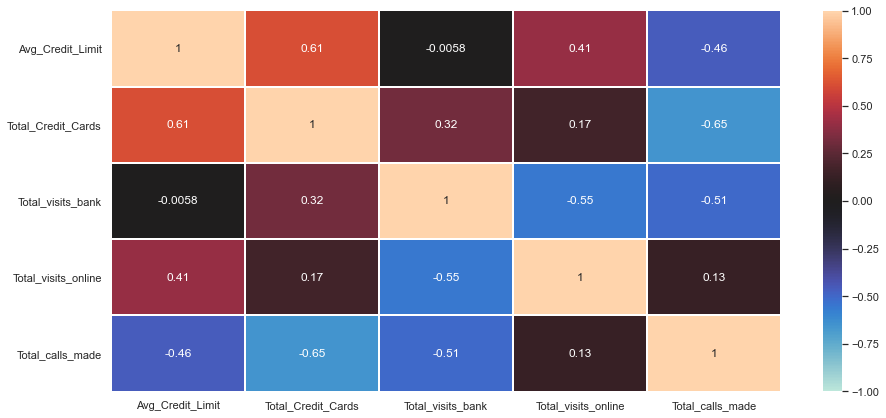

In [44]:
# correlation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

- Total_credit_cards and avg_credit_limit is the strongest positive correlation, which makes some sense as some of their cards might have a higher credit limit than their others
- Total_calls_made is negatively correlated with Avg_Credit_Limit, Total_Credit_Cards, and Total_visits_bank; I'm not sure why but people who tend to call the bank often are less likely to have many credit cards and visit the bank, but not less likely to visit online. It seems that some people stick primarily to contacting the bank from home, and these people tend to have fewer credit cards
- This is reinforced by the fact that Total_visits_bank is slightly correlated with total_credit_cards, and is negatively correlated with total_visits_online and total_calls_made. So it seems that people who visit the bank frequently tend to make it their primary channel for communication with the bank, and these people are more likely to have more credit cards

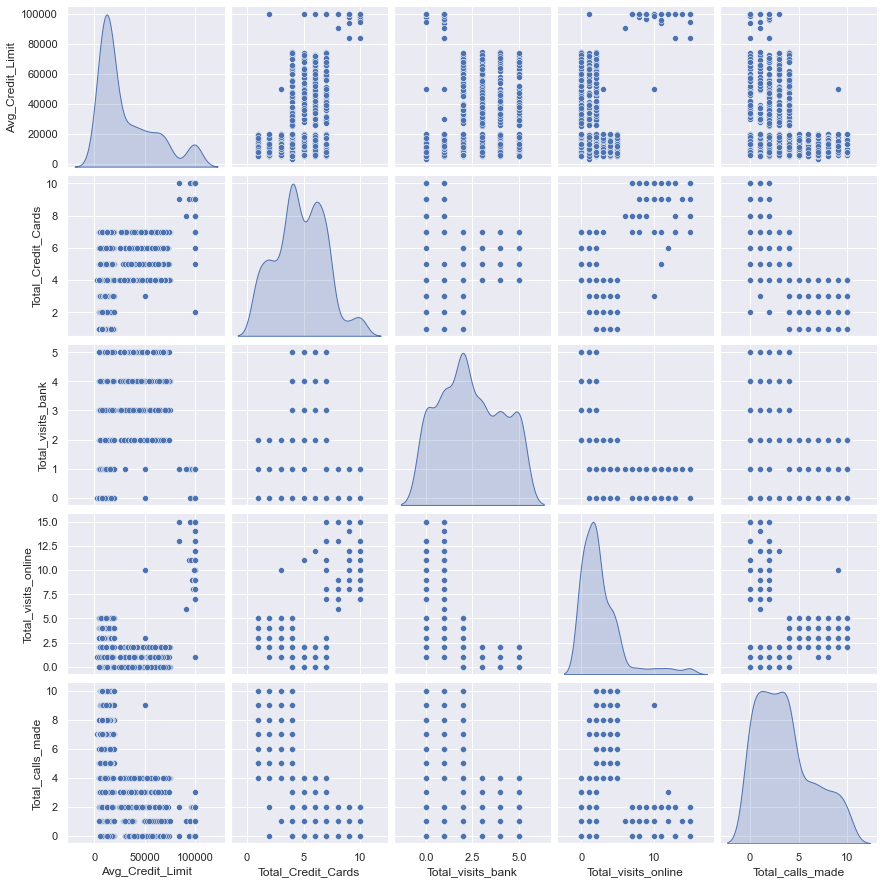

In [45]:
# Pairplot
sns.pairplot(data, diag_kind='kde')

- Avg_Credit_Limit, Total_visits_online, and Total_calls_made are all right skewed

## Scaling and K-Means clustering

In [49]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [50]:
# Scaling the data set before clustering
scaler=StandardScaler()
subset=data.copy()
subset_scaled=scaler.fit_transform(subset)   

In [51]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0490677162438815
Number of Clusters: 2 	Average Distortion: 1.4900641799917311
Number of Clusters: 3 	Average Distortion: 1.1901471233934933
Number of Clusters: 4 	Average Distortion: 1.0718241033628089
Number of Clusters: 5 	Average Distortion: 1.0047500975130412
Number of Clusters: 6 	Average Distortion: 0.9498881243220262
Number of Clusters: 7 	Average Distortion: 0.9112377429999952
Number of Clusters: 8 	Average Distortion: 0.8869230767177811


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

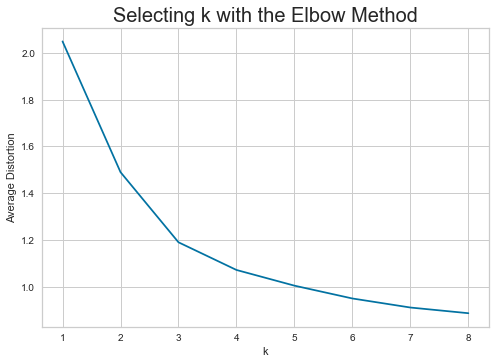

In [52]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

- Using the elbow method, it seems the best value for k is 3

In [53]:
# Now to check the silhouette score
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41333793789261086)
For n_clusters = 3, silhouette score is 0.5059586703248061)
For n_clusters = 4, silhouette score is 0.3828565625891346)
For n_clusters = 5, silhouette score is 0.35111547551208894)
For n_clusters = 6, silhouette score is 0.27365964066544946)
For n_clusters = 7, silhouette score is 0.26918016091225255)
For n_clusters = 8, silhouette score is 0.260193155130275)
For n_clusters = 9, silhouette score is 0.2368673596704612)


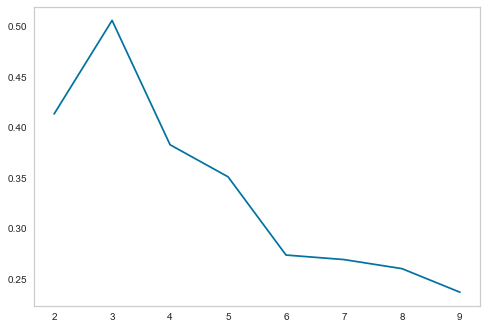

In [54]:
plt.plot(cluster_list,sil_score)
plt.grid()

- It seems that 3 clusters maximises the silhouette coefficient
- There is a drop off after 5 clusters

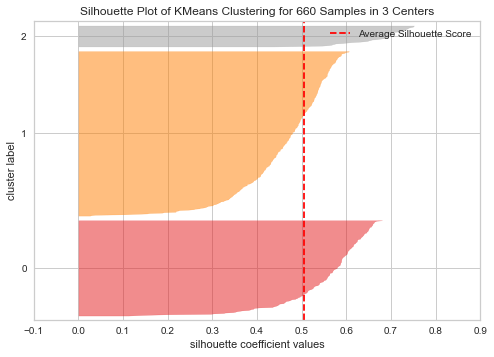

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

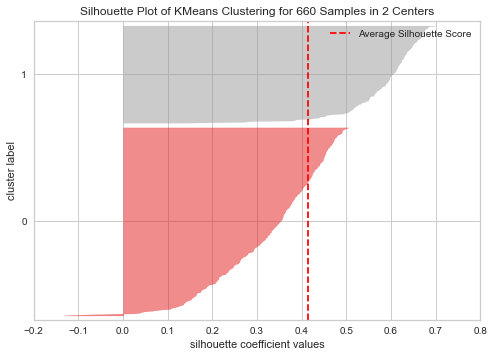

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

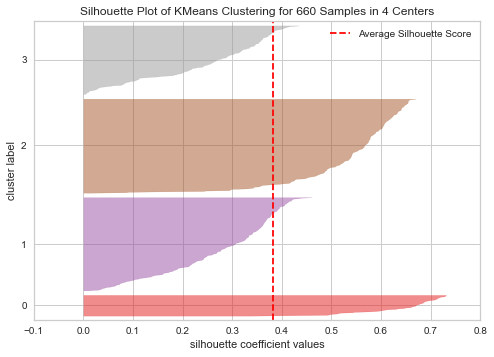

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

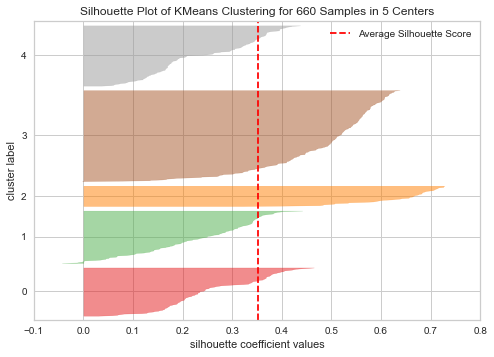

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

- It appears that any value of k between 2 and 5 would have sufficient silhouette scores
- I will be using 3 clusters as it maximizes the silhouette coefficient and it was the k value that satisfied the elbow method

In [59]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [71]:
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [73]:
cluster_profile = subset_scaled_df.groupby('K_means_segments').mean()

In [74]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,
0,0.086924,0.373690,0.666395,-0.553672,-0.553005
1,-0.692068,-1.059623,-0.901518,0.322997,1.148109
2,2.429408,1.862226,-1.105763,2.827319,-0.874330


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[K_means_segments]'>],
       [<AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[K_means_segments]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:>]], dtype=object)

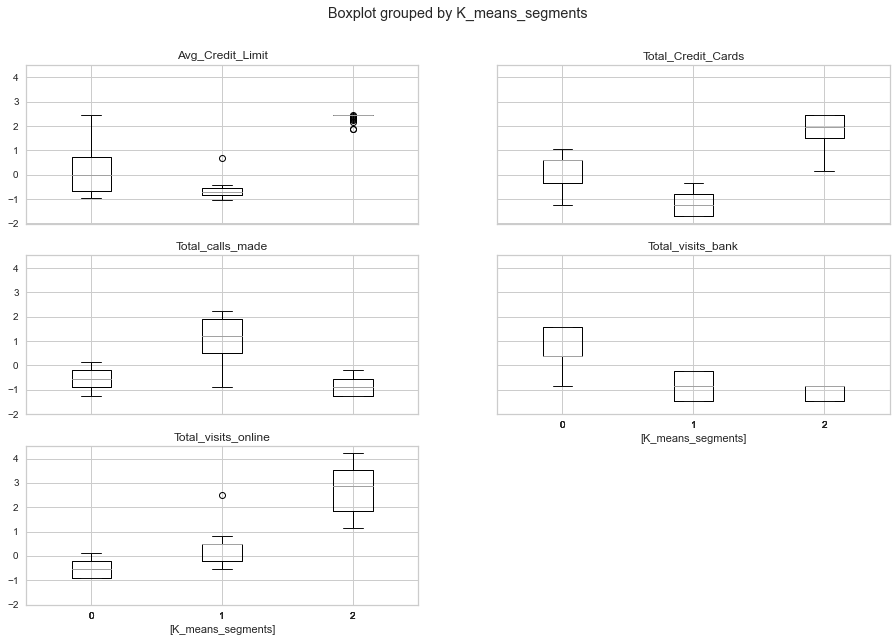

In [75]:
subset_scaled_df.boxplot(by='K_means_segments', figsize=(15,10))

<AxesSubplot:xlabel='K_means_segments'>

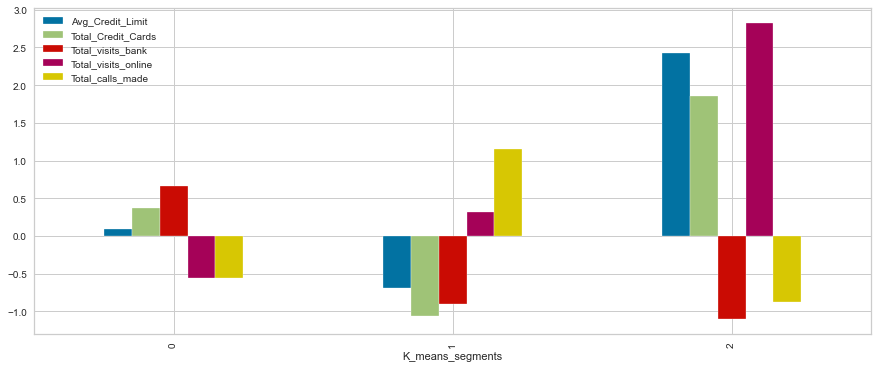

In [76]:
subset_scaled_df.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

#### Cluster 0:
- Has a low or average avg_credit_limit, a middling amount of credit cards and the highest amount of visits to the bank, but the lowest online visits and the second lowest calls made
- This is the cluster of people whose primary channel of communication with the bank is visiting the bank. They have an average number of credit cards and average credit limit.

#### Cluster 1:
- People whose primary channel of communication is phone calls. They sometimes visit online but visit the bank infrequently
- They have the fewest credit cards and the lowest average credit limit

#### Cluster 2:
- People whose primary channel of communication is online. They are the least likely to call the bank or visit in person
- This cluster has by far the highest amount of credit cards and average credit limit

#### Insights
- It seems that these clusters form according to the method used the communicate with the bank most often

## Hierarchical Clustering

In [83]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [84]:
#remaking the scaled dataframe
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

#### Mean/average linkage

In [85]:
Z = linkage(subset_scaled_df, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

0.8863348789359827

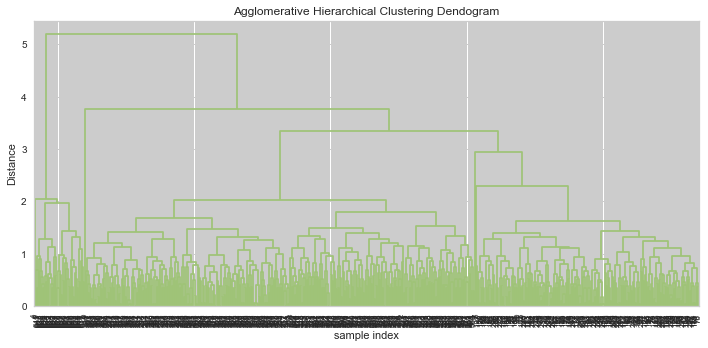

In [86]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### Complete/Maximum linkage

In [88]:
Z = linkage(subset_scaled_df, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

0.8649005070616405

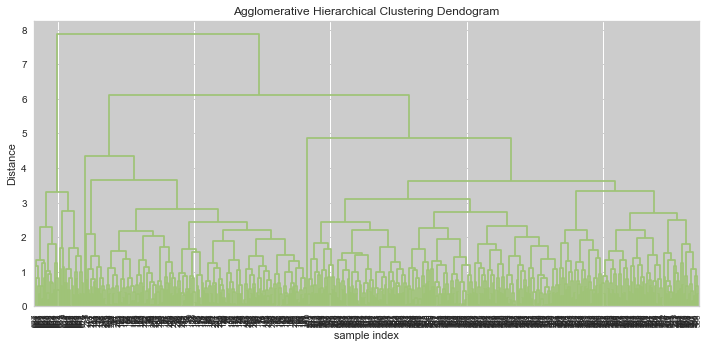

In [89]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### Ward linkage

In [90]:
Z = linkage(subset_scaled_df, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

0.743113942307993

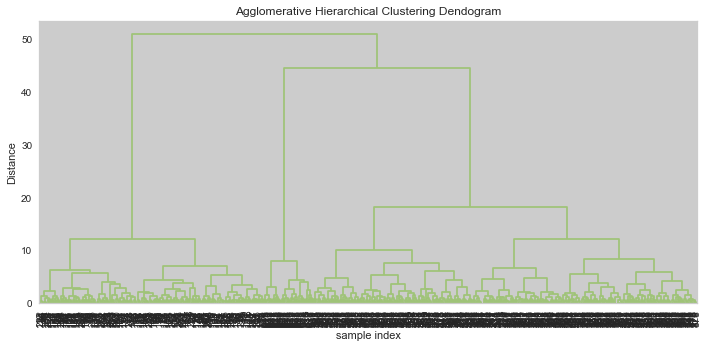

In [91]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

#### Single Linkage

In [103]:
Z = linkage(subset_scaled_df, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

0.8612528442698159

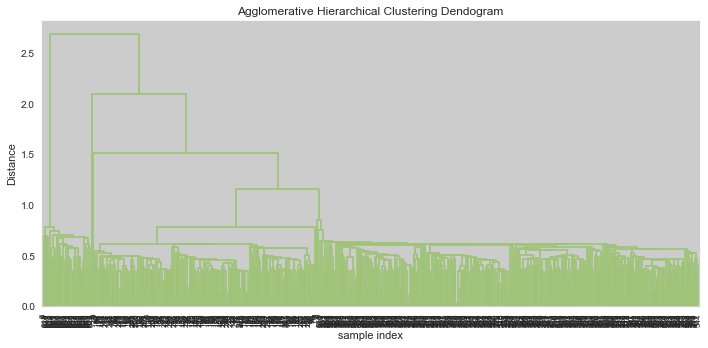

In [104]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [105]:
Z = linkage(subset_scaled_df, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

0.9053680573432437

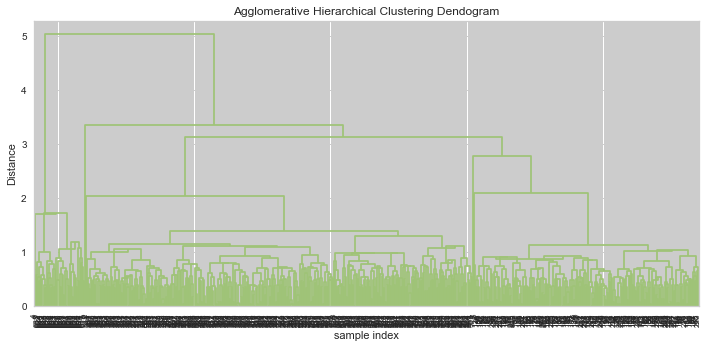

In [106]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

- Dendogram with a higher cophenetic correlation will be more faithful to data
- Centroid linkage had the best cophenetic correlation
- Ward was the dendogram with the most distinct and clear clusters
- 3 appears to be the best number of clusters

In [111]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
model.fit(subset_scaled_df)
subset_scaled_df['clusters'] = model.labels_

In [112]:
cluster_profile = subset_scaled_df.groupby('clusters').mean()

In [113]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
clusters,,,,,
0,0.089432,0.374308,0.668767,-0.554573,-0.554819
1,-0.692897,-1.054310,-0.898610,0.320643,1.143653
2,2.429408,1.862226,-1.105763,2.827319,-0.874330


<AxesSubplot:xlabel='clusters'>

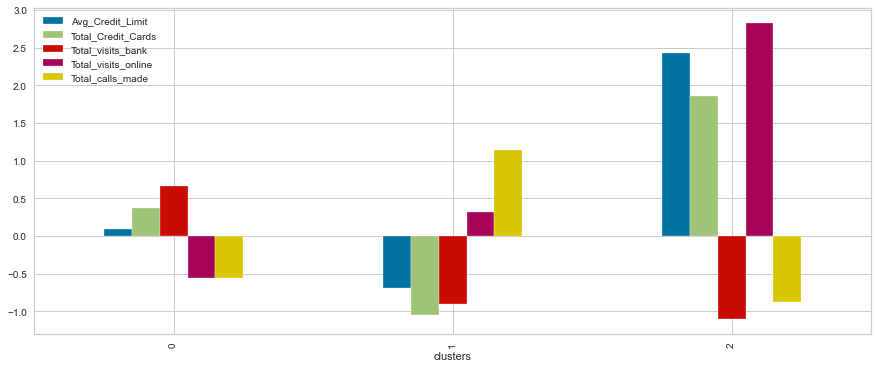

In [114]:
subset_scaled_df.groupby('clusters').mean().plot.bar(figsize=(15,6))

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[clusters]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[clusters]'>],
       [<AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[clusters]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[clusters]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[clusters]'>,
        <AxesSubplot:>]], dtype=object)

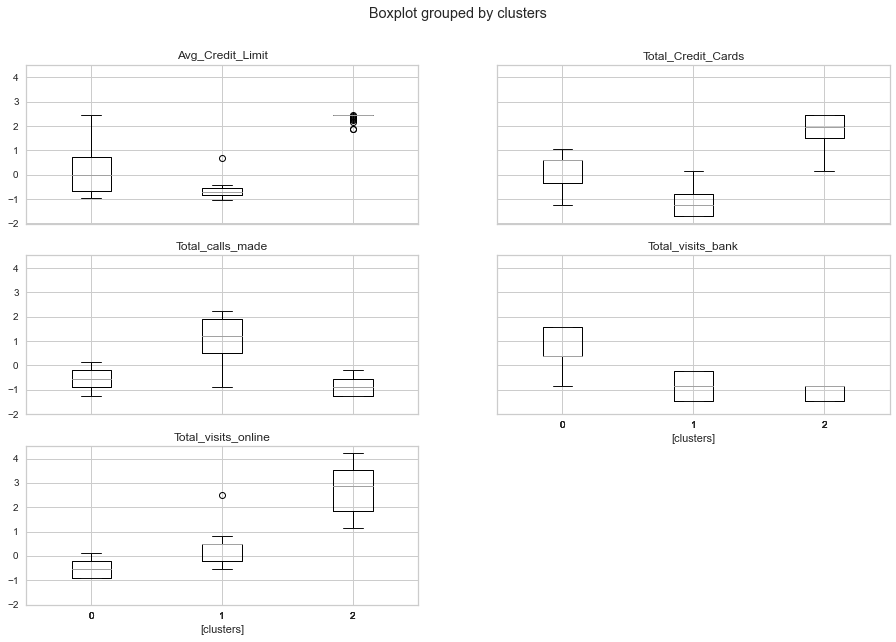

In [115]:
subset_scaled_df.boxplot(by='clusters', figsize=(15,10))

### It seems that the clusters given by kmeans and agglomerative were the same
#### Cluster 0:
- Has a low or average avg_credit_limit, a middling amount of credit cards and the highest amount of visits to the bank, but the lowest online visits and the second lowest calls made
- This is the cluster of people whose primary channel of communication with the bank is visiting the bank. They have an average number of credit cards and average credit limit.

#### Cluster 1:
- People whose primary channel of communication is phone calls. They sometimes visit online but visit the bank infrequently
- They have the fewest credit cards and the lowest average credit limit

#### Cluster 2:
- People whose primary channel of communication is online. They are the least likely to call the bank or visit in person
- This cluster has by far the highest amount of credit cards and average credit limit

#### Insights
- It seems that these clusters form according to the method used the communicate with the bank most often

## Recommendations
- The biggest spenders tend to use online channels the most to interact with the bank, so the bank should focus on improving these channels the most
- Those who have the least amount of cards have primarily use the phone to contact the bank, so I would recommend pushing a promotion for opening new cards while people are on the phone with the bank, perhaps while they are on hold or at the end
- This promotion could also be brought up when people visit the bank, to add new cards to their accounts as well